# Section 2: Visualisations

## Objectives

Creating visualisations to assist in answering investigation questions. 

## Inputs

The input was "Methan_final_cleaned.csv"

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/vscode-projects/Global_Methane_Flux_Analysis/Global_Methane_Flux_Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/vscode-projects/Global_Methane_Flux_Analysis/Global_Methane_Flux_Analysis'

Section 2 Load Cleaned Data

In [4]:
import pandas as pd

df = pd.read_csv('Dataset/cleaned/Methane_final_cleaned.csv')
df

,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022
...,...,...,...,...,...,...,...
1417,Russia & Caspian,Uzbekistan,5.676000,Energy,Other from coal,All,2022
1418,Russia & Caspian,Uzbekistan,16.973917,Energy,Other from oil and gas,All,2022
1419,Russia & Caspian,Uzbekistan,18.299999,Energy,Satellite-detected large oil and gas emissions,All,2022
1420,Russia & Caspian,Uzbekistan,780.916138,Energy,Total,All,2022


Import Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

---

Sorting highest emission values

In [ ]:
df_top_emissions_country=df.sort_values(by='emissions', ascending=False)[['country','region', 'emissions','type','baseYear']]
#top countries sorted by emissions, but including duplicate data with total

Displaying data of highest emission values with extra columns

In [17]:
df_top_emissions_country

,country,region,emissions,type,baseYear
438,China,Asia Pacific,25372.222656,Energy,2022
420,China,Asia Pacific,18501.914062,Agriculture,2019-2021
440,India,Asia Pacific,18358.517578,Agriculture,2019-2021
1388,Russia,Russia & Caspian,18078.083984,Energy,2022
1309,United States,North America,16769.630859,Energy,2022
...,...,...,...,...,...
1319,Other,Other,0.001951,Energy,2022
224,Morocco,Africa,0.001264,Energy,2022
901,Netherlands,Europe,0.001164,Energy,2022
906,Netherlands,Europe,0.001081,Energy,2022


Separating out sub items by using "segment=total", to not have duplicates in the data,the sub items will be used later 

In [67]:
df_segment_total=df[df['segment']== 'Total'][['country', 'emissions','type','region','baseYear']]#only looking into type=total as I dont want to see the sub items yet 

Sorting the emissions column in ascending order

In [68]:
df_segment_total20=df_segment_total.sort_values(by='emissions', ascending=False)

---

Plotting a Bar Chart showing global emissions, hovering over provides additional info (year and continent)

In [77]:
fig = px.bar(df_segment_total20, x='emissions', y='country',color="type",barmode="stack", title='Bar Chart of Global Methane Emissions',hover_data=['region','baseYear'])

fig.show()

Zoning in on the top 5 highest producing emission countries

In [73]:
df_segment_total_int5=df_segment_total[
    df_segment_total['country'].isin(['China', 'Russia', 'United States', 'Brazil', 'India'])
].sort_values(by='emissions', ascending=False)


Creating a bar chart of the top 5 countries with the highest emission rates

In [91]:
fig = px.bar(df_segment_total_int5, x='country', y='emissions',text='emissions',color="type",barmode="stack", title='Bar Chart of Top 5 Global Methane Emissions',category_orders={
        "country": ['China', 'United States','India', 'Russia', 'Brazil']},hover_data=['region','baseYear'] 
    )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=3.5, uniformtext_mode='hide')
fig.show()

Preparing data for mapbox plot, I needed the unique values of the "country" column

In [100]:
df['country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', "Cote d'Ivoire",
       'Democratic Republic of Congo', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Liberia', 'Libya', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Australia',
       'Bangladesh', 'Brunei', 'China', 'India', 'Indonesia', 'Japan',
       'Korea', 'Malaysia', 'Mongolia', 'New Zealand',
       'Other countries in Southeast Asia', 'Pakistan', 'Philippines',
       'Thailand', 'Vietnam', 'Argentina', 'Bolivia', 'Brazil',
       'Colombia', 'Cuba', 'Ecuador', 'Guyana', 'Paraguay', 'Peru',
       'Trinidad and Tobago', 'Uruguay', 'Venezuela', 'Denmark',
       'Estonia', 'European Union', 'France', 'Germany', 'Israel',
      

Assigning these values to a dataframe

In [98]:
df_targeted_countries=df['country'].unique()

Using ChatGPT to give me the Latitude and Longitude of each country in my "country" column as well as the grouped values coordinate mid-point

In [120]:
country_coords_int = {
    'Algeria': [28.0339, 1.6596],
    'Angola': [-11.2027, 17.8739],
    'Benin': [9.3077, 2.3158],
    'Botswana': [-22.3285, 24.6849],
    'Cameroon': [7.3697, 12.3547],
    'Central African Republic': [6.6111, 20.9394],
    'Chad': [15.4542, 18.7322],
    'Congo': [-0.228, 15.8277],
    "Cote d'Ivoire": [7.54, -5.5471],
    'Democratic Republic of Congo': [-4.0383, 21.7587],
    'Egypt': [26.8206, 30.8025],
    'Equatorial Guinea': [1.6508, 10.2679],
    'Eritrea': [15.1794, 39.7823],
    'Ethiopia': [9.145, 40.4897],
    'Gabon': [-0.8037, 11.6094],
    'Gambia': [13.4432, -15.3101],
    'Ghana': [7.9465, -1.0232],
    'Guinea': [9.9456, -9.6966],
    'Guinea-Bissau': [11.8037, -15.1804],
    'Kenya': [-0.0236, 37.9062],
    'Liberia': [6.4281, -9.4295],
    'Libya': [26.3351, 17.2283],
    'Morocco': [31.7917, -7.0926],
    'Mozambique': [-18.6657, 35.5296],
    'Namibia': [-22.9576, 18.4904],
    'Niger': [17.6078, 8.0817],
    'Nigeria': [9.082, 8.6753],
    'Senegal': [14.4974, -14.4524],
    'Seychelles': [-4.6796, 55.492],
    'Sierra Leone': [8.4606, -11.7799],
    'Somalia': [5.1521, 46.1996],
    'South Africa': [-30.5595, 22.9375],
    'South Sudan': [6.877, 31.307],
    'Sudan': [12.8628, 30.2176],
    'Tanzania': [-6.369, 34.8888],
    'Togo': [8.6195, 0.8248],
    'Tunisia': [33.8869, 9.5375],
    'Australia': [-25.2744, 133.7751],
    'Bangladesh': [23.685, 90.3563],
    'Brunei': [4.5353, 114.7277],
    'China': [35.8617, 104.1954],
    'India': [20.5937, 78.9629],
    'Indonesia': [-0.7893, 113.9213],
    'Japan': [36.2048, 138.2529],
    'Korea': [35.9078, 127.7669],
    'Malaysia': [4.2105, 101.9758],
    'Mongolia': [46.8625, 103.8467],
    'New Zealand': [-40.9006, 174.886],
    'Pakistan': [30.3753, 69.3451],
    'Philippines': [13.41, 122.56],
    'Thailand': [15.87, 100.9925],
    'Vietnam': [14.0583, 108.2772],
    'Brazil': [-14.235, -51.9253],
    'United States': [37.0902, -95.7129],
    'Russia': [61.524, 105.3188],
    'United Kingdom': [55.3781, -3.4360],
    'Germany': [51.1657, 10.4515],
    'France': [46.2276, 2.2137],
    'European Union': [50.1109, 8.6821],  # near Frankfurt, DE (central EU location)
    'Other EU17 countries': [51.0, 10.0],  # roughly central western Europe
    'Other EU7 countries': [50.5, 13.0],   # around Czech Republic / Austria area
    'Other countries in Southeast Asia': [5.0, 115.0],  # general Borneo/SEA midpoint
    'United Arab Emirates': [23.4241, 53.8478],# UAE centroid
    'Other': [-6.5, 155.0],  # Near Solomon Islands / Papua New Guinea / Pacific center
    'Iran': [32.4279, 53.6880],
    'Turkmenistan': [38.9697, 59.5563],
    'Argentina': [-38.4161, -63.6167],
    'Saudi Arabia': [23.8859, 45.0792],
    'Kazakhstan': [48.0196, 66.9237],
    'Venezuela': [6.4238, -66.5897],
    'Bolivia': [-16.2902, -63.5887],
'Colombia': [4.5709, -74.2973],
'Cuba': [21.5218, -77.7812],
'Ecuador': [-1.8312, -78.1834],
'Guyana': [4.8604, -58.9302],
'Paraguay': [-23.4425, -58.4438],
'Peru': [-9.1900, -75.0152],
'Trinidad and Tobago': [10.6918, -61.2225],
'Uruguay': [-32.5228, -55.7658],
'Denmark': [56.2639, 9.5018],
'Estonia': [58.5953, 25.0136],
'Israel': [31.0461, 34.8516],
'Italy': [41.8719, 12.5674],
'Netherlands': [52.1326, 5.2913],
'Norway': [60.472, 8.4689],
'Other countries in Europe': [54.526, 15.2551],
'Poland': [51.9194, 19.1451],
'Romania': [45.9432, 24.9668],
'Slovenia': [46.1512, 14.9955],
'Sweden': [60.1282, 18.6435],
'Ukraine': [48.3794, 31.1656],
'Bahrain': [26.0667, 50.5577],
'Iraq': [33.2232, 43.6793],
'Jordan': [30.5852, 36.2384],
'Kuwait': [29.3117, 47.4818],
'Lebanon': [33.8547, 35.8623],
'Oman': [21.5126, 55.9233],
'Qatar': [25.276987, 51.520008],
'Syria': [34.8021, 38.9968],
'Yemen': [15.5527, 48.5164],
'Canada': [56.1304, -106.3468],
'Mexico': [23.6345, -102.5528],
'Azerbaijan': [40.1431, 47.5769],
'Uzbekistan': [41.3775, 64.5853]
}

Plotting the iteractive mapbox of Global emissions

In [177]:
#mapbox for top 5 countries and then expanded to global

# Define the target countries
target_countries = ['China', 'United States', 'India', 'Russia', 'Brazil']

# Create a lookup for lat/lon
country_coords = {
    'China': [35.8617, 104.1954],
    'United States': [37.0902, -95.7129],
    'India': [20.5937, 78.9629],
    'Russia': [61.5240, 105.3188],
    'Brazil': [-14.2350, -51.9253]
}

# Filter the DataFrame for selected countries
df_filtered = df_segment_total20[df_segment_total20['country'].isin(df_targeted_countries)].copy()

# Add lat/lon columns
df_filtered['lat'] = df_filtered['country'].map(lambda c: country_coords_int[c][0])
df_filtered['lon'] = df_filtered['country'].map(lambda c: country_coords_int[c][1])

# Plot with Mapbox
fig = px.scatter_mapbox(
    df_filtered,
    lat='lat',
    lon='lon',
    size='emissions',
    color='country',
    hover_name='country',
    hover_data={'emissions': True, 'lat': False, 'lon': False,'region': True,'baseYear': True,'type': True},
    zoom=1,
    size_max=50,
    title='Global Methane Emissions Map',
    mapbox_style='carto-positron'
)

fig.show()

Investigating bottom emission countries by querying a low value of <130

In [137]:
df_segment_total.groupby('country', as_index=False).sum(numeric_only=True).query('emissions < 130').sort_values(by='emissions') # bottom emission countries global
    

,country,emissions
80,Seychelles,2.570026
51,Liberia,28.580852
32,Gambia,43.655927
11,Brunei,54.024805
36,Guinea-Bissau,61.595277
82,Slovenia,74.066556
27,Estonia,76.677326
91,Togo,107.866121
37,Guyana,113.281854
50,Lebanon,129.004585


Investigating lower emissions country by also adding in the column for the continents

In [ ]:
df_segment_total.groupby('country', as_index=False).sum(numeric_only=True).query('emissions < 130').sort_values(by='emissions').merge(df_segment_total[['country', 'region']].drop_duplicates(), on='country', how='left')[['country', 'region', 'emissions']]
#regions added

,country,region,emissions
0,Seychelles,Africa,2.570026
1,Liberia,Africa,28.580852
2,Gambia,Africa,43.655927
3,Brunei,Asia Pacific,54.024805
4,Guinea-Bissau,Africa,61.595277
5,Slovenia,Europe,74.066556
6,Estonia,Europe,76.677326
7,Togo,Africa,107.866121
8,Guyana,Central and South America,113.281854
9,Lebanon,Middle East,129.004585


Preparing the Pie chart's data by grouping "region" data together

In [149]:
df_continents_total=df_segment_total.groupby('region', as_index=False).sum(numeric_only=True)

Checking the contents of the dataframe

In [150]:
df_continents_total


,region,emissions
0,Africa,38184.797715
1,Asia Pacific,132135.516548
2,Central and South America,37588.235362
3,Europe,41471.322392
4,Middle East,21733.309996
5,North America,41812.706360
6,Other,12894.389160
7,Russia & Caspian,35411.705814


Plotting a Pie Chart for Continental emission data

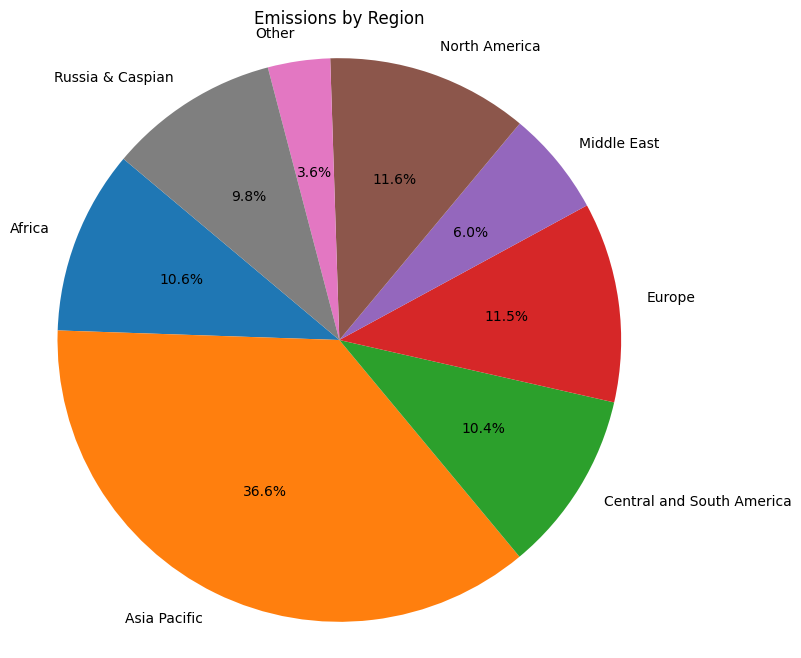

In [151]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    df_continents_total['emissions'],
    labels=df_continents_total['region'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Emissions by Region')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

Preparing data for Bar Chart for bottom emission countries

In [132]:
df_segment_total_bottom10=df_segment_total[
    df_segment_total['country'].isin(['Seychelles', 'Liberia', 'Gambia', 'Brunei', 'Guinea-Bissau','Slovenia','Estonia','Togo','Guyana','Lebanon'])
].sort_values(by='emissions', ascending=True)

Plotting the Bar chart for bottom 10 emission countries

In [141]:
fig = px.bar(df_segment_total_bottom10, x='country', y='emissions',text='emissions',color="type",barmode="stack", title='Bottom 10 Global Methane Emissions Countries',category_orders={
        "country": ['Seychelles', 'Liberia', 'Gambia', 'Brunei', 'Guinea-Bissau','Slovenia','Estonia','Togo','Guyana','Lebanon']},hover_data=['region','baseYear'] 
    )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=3.5, uniformtext_mode='hide')
fig.show()

Investigating the highest country - 'China'

In [ ]:
df[df['country'] == 'China'] #with total

,region,country,emissions,type,segment,reason,baseYear
420,Asia Pacific,China,18501.914062,Agriculture,Total,All,2019-2021
421,Asia Pacific,China,984.200012,Energy,Bioenergy,All,2022
422,Asia Pacific,China,5418.770020,Energy,Coking coal,All,2022
423,Asia Pacific,China,552.119995,Energy,Gas pipelines and LNG facilities,Fugitive,2022
424,Asia Pacific,China,294.390991,Energy,Gas pipelines and LNG facilities,Vented,2022
425,Asia Pacific,China,16.911100,Energy,Offshore gas,Fugitive,2022
426,Asia Pacific,China,36.693699,Energy,Offshore gas,Vented,2022
427,Asia Pacific,China,15.842800,Energy,Offshore oil,Flared,2022
428,Asia Pacific,China,18.197001,Energy,Offshore oil,Fugitive,2022
429,Asia Pacific,China,246.535004,Energy,Offshore oil,Vented,2022


Filtering out the total values in "segments" column

In [163]:
#visual to display types

df_china_no_total_energy=df[(df['country'] == 'China') & (df['type'] == 'Energy') & (df['segment'] != 'Energy')] #without total

checking contents of dataframe

In [164]:
df[(df['country'] == 'China') & (df['type'] == 'Energy') & (df['segment'] != 'Energy')]

,region,country,emissions,type,segment,reason,baseYear
421,Asia Pacific,China,984.200012,Energy,Bioenergy,All,2022
422,Asia Pacific,China,5418.770020,Energy,Coking coal,All,2022
423,Asia Pacific,China,552.119995,Energy,Gas pipelines and LNG facilities,Fugitive,2022
424,Asia Pacific,China,294.390991,Energy,Gas pipelines and LNG facilities,Vented,2022
425,Asia Pacific,China,16.911100,Energy,Offshore gas,Fugitive,2022
426,Asia Pacific,China,36.693699,Energy,Offshore gas,Vented,2022
427,Asia Pacific,China,15.842800,Energy,Offshore oil,Flared,2022
428,Asia Pacific,China,18.197001,Energy,Offshore oil,Fugitive,2022
429,Asia Pacific,China,246.535004,Energy,Offshore oil,Vented,2022
430,Asia Pacific,China,254.276001,Energy,Onshore gas,Fugitive,2022


Plotting bar chart for sub items under "segments" column to better understand where the extraction originates and if it was controlled or not

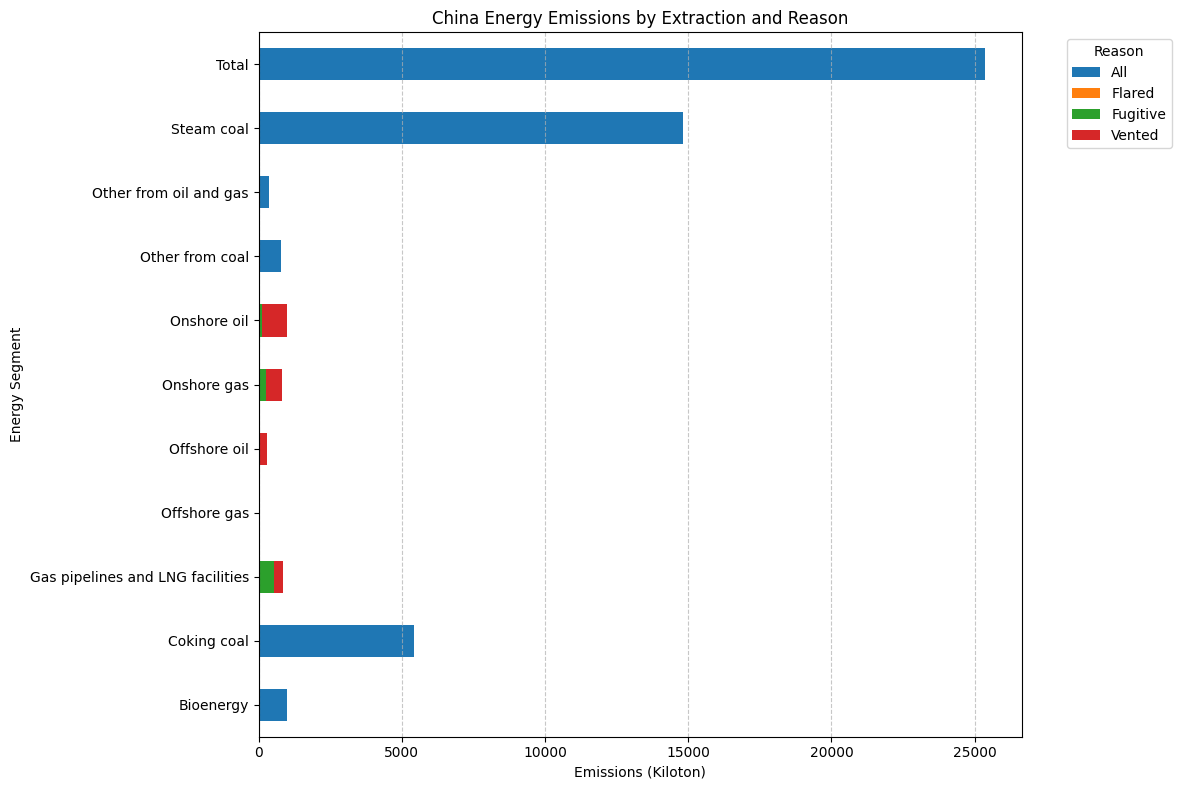

In [176]:

# Group and reshape data for stacked bar
df_ch_grouped = df_china_no_total_energy.groupby(['segment', 'reason'])['emissions'].sum().unstack(fill_value=0)

# Plot horizontal stacked bar chart
df_ch_grouped.plot(kind='barh', stacked=True, figsize=(12, 8))

# Labels and styling
plt.title('China Energy Emissions by Extraction and Reason')
plt.xlabel('Emissions (Kiloton)')
plt.ylabel('Energy Segment')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Conclusions and Next Steps

Investigation Questions and Answers section:


   - How do developed vs. developing countries compare in methane output?
      - Answer: Developed countries compare more in their Methane Gas outputs.
   - Which countries or regions contribute the most to methane emissions?
      - Answer: 
          - Countries: China, United States, India, Russia and Brazil
          - Region: Asia Pacific   
   - Who are the top 5 methane-emitting countries in the most recent year?
      - Answer: China, United States, India, Russia and Brazil
   - Who are the bottom 10 methane-emitting countries in the most recent year?
      - Answer: Seychelles, Liberia, Gambia, Brunei, Guinea-Bissau,Slovenia,Estonia,Togo,Guyana,Lebanon
   - Does the highest emitting country participate in uncontrolled releases of Methane Gas in the atmosphere?
      - Answer: Yes, China does so in onshore oil, onshore gas and offshore gas productions. Shown in "vented" red coloured in the graph named 'China Energy Emissions by Extraction and Reason'.
   - Which sector(Energy, Waste and Agriculture) produces the most Emissions?
      - Answer: Energy sector
   - Which continent produces the highest Methane Emissions?
      - Answer: Asia

Next steps:

    -   To use this data and make these countries accountable for their actions and also how much they play a part in Methane Gas emissions
    -   Add supporting datasets for example, GDP and C02 Emission per capita statistics to strengthen the plots, also earlier data to create a time series